In [4]:
# 모듈 로딩
import pandas as pd
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# DF객체 생성
weatherDF = pd.read_csv('daegu_utf-8.csv')
weatherDF.head(5)

# '날짜'열 datetime 형식으로 변환
weatherDF['날짜'] = pd.to_datetime(weatherDF['날짜'])

시작 연도를 입력하세요 : 2000
마지막 연도를 입력하세요 : 2021
기온 변화를 측정할 달을 입력하세요 : 2
2월 최고기온 평균:
[ 6.   8.9 10.   8.6 10.6  6.   8.1 11.9  7.  11.5  8.7  9.5  5.9  7.5
  9.3  9.   8.3  8.8  7.1  9.1 10.4 11.1]
2월 최저기온 평균:
[-2.9 -0.4 -1.3 -0.2 -0.6 -2.6 -1.3  1.2 -3.2  1.7 -0.1 -0.5 -3.2 -1.8
  0.3 -0.6 -1.7 -2.2 -4.2 -0.9  0.2 -0.6]


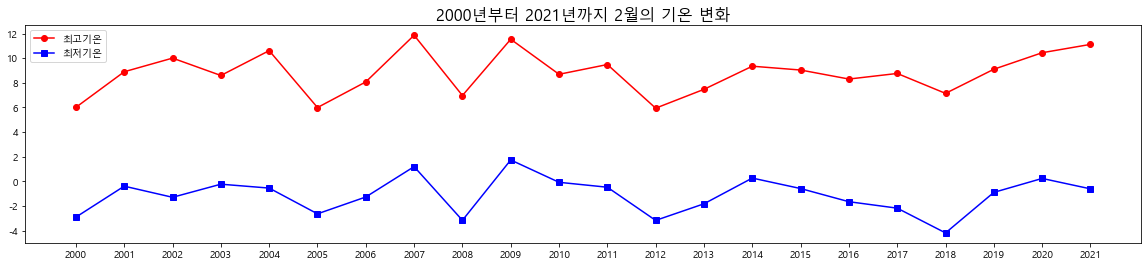

In [10]:
def draw_graph_on_date():
    while True:    # 시작연도 입력받기
        try:
            start_year = int(input('시작 연도를 입력하세요 : '))
            if (start_year < 1907) or (start_year > 2023) :
                print('잘못된 연도입니다.')
            else:
                break
        except: 
            print('잘못된 연도입니다.')

    while True:    # 마지막연도 입력받기
        try:
            end_year = int(input('마지막 연도를 입력하세요 : '))
            if (end_year < 1907) or (end_year > 2023) or (end_year < start_year) :
                print('잘못된 연도입니다.')
            else:
                break
        except: 
            print('잘못된 연도입니다.')  

    while True:    # 월 입력받기
        try:
            month = int(input('기온 변화를 측정할 달을 입력하세요 : '))
            if (month < 1) or (month > 12) :
                print('잘못된 월입니다.')
            else:
                break
        except: 
            print('잘못된 월입니다.')

    # 연도 및 월 필터링
    filterDF = weatherDF[(weatherDF['날짜'].dt.year >= start_year) & (weatherDF['날짜'].dt.year <= end_year) & (weatherDF['날짜'].dt.month == month)]
    
    max_temp = []
    min_temp = []
    for i in range(start_year, end_year + 1):    # 월별 최고, 최저 평균기온 리스트로 저장
        filterDF_2 = filterDF[filterDF['날짜'].dt.year == i]
        max_temp.append(filterDF_2['최고기온'].mean())
        min_temp.append(filterDF_2['최저기온'].mean())
    
    # print문 출력
    print(f'{month}월 최고기온 평균:\n{np.round(max_temp,1)}')
    print(f'{month}월 최저기온 평균:\n{np.round(min_temp,1)}')
    
    # x축으로 사용할 year 리스트 생성
    year_list = pd.date_range(start=str(start_year), end=str(end_year+1), freq='Y').strftime('%Y').to_list()
    year_list
    
    # 그래프 시각화
    plt.figure(figsize=(20, 4))
    plt.plot(year_list, max_temp, 'ro-', label='최고기온')
    plt.plot(year_list, min_temp, 'bs-', label='최저기온')
    if platform.system() == 'Windows':    # 윈도우
        font_name = fm.FontProperties(fname='c:\Windows\Fonts\malgun.ttf').get_name()
        plt.rc('font', family=font_name)
    else:    # 그 외
        plt.rc('font', family='AppleGothic', size=8)
    plt.rcParams['axes.unicode_minus'] = False
    plt.title(f"{start_year}년부터 {end_year}년까지 {month}월의 기온 변화", size=16)
    plt.legend(loc=2)
    plt.show()

draw_graph_on_date()

In [13]:
weatherDF = pd.read_csv('daegu_utf-8.csv')
weatherDF.head(5)

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0


In [26]:
import csv
import matplotlib.pyplot as plt

def draw_graph_on_date(start_year, end_year, month):
        high_temp=[]
        low_temp=[]
        x_year=[]
        for i in range(start_year, end_year+1):
            with open('daegu_utf-8.csv', encoding='utf-8') as f:
                data=csv.reader(f)
                next(data)
                sub_month_low=[]
                sub_month_high=[]
                for row in data:
                    my_year=int(row[0].split('-')[0])
                    my_month=int(row[0].split('-')[1])

                    if my_year==i and my_month==month:

                        sub_month_low.append(float(row[-2]))
                        sub_month_high.append(float(row[-1]))


                if len(sub_month_low)!=0 and len(sub_month_high)!=0:
                    high_temp.append(my_avg(sub_month_high))
                    low_temp.append(my_avg(sub_month_low))
                    print('start_year ===> ', i, sep='\n')
                    print('high ===> \n', high_temp)
                    print('low ====> \n', low_temp)
                        
# 리스트 평균 구하는 함수
def my_avg(my_list):
    total=0
    for num in my_list:
        total+=num
    return total/len(my_list)
            
start_year=int(input('시작 연도를 입력하세요 : '))
end_year=int(input('마지막 연도를 입력하세요 : '))
month=int(input('조사하고 싶은 월을 입력하세요 : '))
draw_graph_on_date(start_year, end_year, month)



시작 연도를 입력하세요 : 2000
마지막 연도를 입력하세요 : 2005
조사하고 싶은 월을 입력하세요 : 1
start_year ===> 
2000
high ===> 
 [5.138709677419354]
low ====> 
 [-2.706451612903226]
start_year ===> 
2001
high ===> 
 [5.138709677419354, 4.748387096774194]
low ====> 
 [-2.706451612903226, -2.8709677419354835]
start_year ===> 
2002
high ===> 
 [5.138709677419354, 4.748387096774194, 6.722580645161289]
low ====> 
 [-2.706451612903226, -2.8709677419354835, -1.4387096774193548]
start_year ===> 
2003
high ===> 
 [5.138709677419354, 4.748387096774194, 6.722580645161289, 4.254838709677419]
low ====> 
 [-2.706451612903226, -2.8709677419354835, -1.4387096774193548, -4.396774193548388]
start_year ===> 
2004
high ===> 
 [5.138709677419354, 4.748387096774194, 6.722580645161289, 4.254838709677419, 6.006451612903225]
low ====> 
 [-2.706451612903226, -2.8709677419354835, -1.4387096774193548, -4.396774193548388, -3.2612903225806447]
start_year ===> 
2005
high ===> 
 [5.138709677419354, 4.748387096774194, 6.722580645161289, 4.25483870967